In [36]:
import sympy
sympy.init_printing()

In [108]:
x_t, t, u, x_hat, u_hat, sigma_x, sigma_v, sigma_L, w = sympy.symbols('x_t t u \hat{x} \hat{u} \sigma_x \sigma_v \sigma_L w')
G1 = sympy.exp( -(x_hat - x_t + t*u)**2 / (2*sigma_x**2))
G2 = sympy.exp( -(u_hat - u)**2 / (2*(sigma_v)**2))
G3 = sympy.exp( -u**2/ (2*sigma_L**2))

In [109]:
integrand = sympy.simplify(G1*G2*G3)

In [110]:
to_solve = sympy.Integral( integrand, (u, (x_t-w/2)/t, (x_t+w/2)/t ) )

We want to solve the integral:

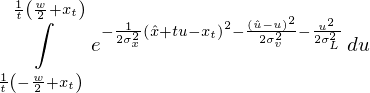

In [111]:
to_solve

In [113]:
exponent = -(u_hat-u)**2 / (2*sigma_v**2) - (t*u-x_t + x_hat)**2 / (2*sigma_x**2) - u**2 / (2*sigma_L**2)
print sympy.exp( exponent) == integrand

True


Now let's put the exponent into a negative quadratic form by completing the square.

In [114]:
def complete_the_square(q):
    """ Takes a quadratic polynomial and completes the square"""
    assert(q.degree() == 2)
    a,b,c = q.coeffs()
    h = sympy.expand( sympy.simplify(-b / (2*a)) )
    k = sympy.expand(c - b**2 / (4*a))
    return a,h,k

In [115]:
p = sympy.simplify( -2* exponent * sigma_x**2 * sigma_v**2 * sigma_L**2)
p

In [116]:
a,b,c = sympy.Poly(p,u).coeffs()
b

In [117]:
a,h,k = complete_the_square( sympy.Poly(p,u) )
a,h,k = [ sympy.simplify(_) for _ in [a,h,k] ]
sympy.simplify( sympy.expand(p - sympy.expand(a*(u-h)**2 + k))) #outputs 0 when p(u) = a(u-h)**2 + k

Now that we've written the exponent in the form $ p = a(u-h)+k$ we have transformed the integral into solving
$$
  I = \int_{u_{\min}}^{u_{\max}} e^{\frac{-1}{2 \sigma_x^2 \sigma_v^2 \sigma_L^2} ( a(x-h)^2 - k /2)} du
$$

We can integrate with respect to $u$ to get our desired integral.  Note that:

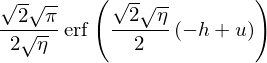

In [131]:
sympy.integrate( sympy.exp( -(u- sympy.symbols('h'))**2 * sympy.symbols('eta')/2 ),u)

Therefore, the desired integral is
$$
    I = e^{\frac{-k}{2 \sigma_x^2 \sigma_L^2 \sigma_v^2}}  \left[ \frac{ \sigma_x \sigma_L \sigma_v \sqrt{\pi} }{\sqrt{2a} } {\rm erf} \left( \sqrt{ \frac{a}{2\sigma_x^2 \sigma_v^2 \sigma_L^2}} (u - h) \right) \right] \Big|_{u = (x_t - w/2)t^{-1}}^{(x_t+w/2)t^{-1}}
$$
where $a$ $h$ and $k$ are given by

In [132]:
a

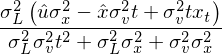

In [133]:
h

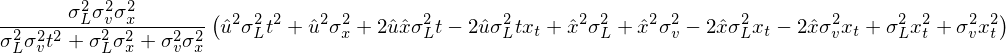

In [134]:
k

We can write $k$ more consicisely as

In [135]:
k_concise = sigma_v**2 * sigma_L**2 * (x_hat - x_t)**2 + sigma_x**2 * sigma_L**2 * u_hat**2 - sigma_L**2 * \
(u_hat * sigma_x**2 - t*sigma_v**2 * (x_hat - x_t) )**2 / (sigma_v**2 * t**2 + sigma_x**2 * (1+ (sigma_v/sigma_L)**2))

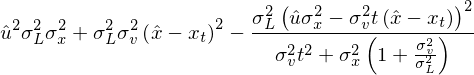

In [136]:
k_concise

In [127]:
sympy.simplify( sympy.expand(k_concise - k) ) #Should output 0 if k_concise = k

According to these calculations, the joint distribution is given by
$$
   \Pr(x_t, lin, \hat{x}_0, \hat{v}_0) = \frac{ e^{-\bar{k}/2} }{ 16 \pi^2 a } E_0 E_1 
$$
where
$$
    \bar{k} = \frac{ \hat{u}^2}{ \sigma_v^2} + \frac{ (\hat{x}_0 - x_t)^2}{ \sigma_x^2}
        - \left( \frac{ \hat{u}}{ \sigma_v^2 } - t \frac{ \hat{x}_0 - x_t }{\sigma_x^2} \right)^2
        \left( \sigma_v t^2 + \sigma_x^2 \left( 1 + \left(\frac{\sigma_v}{\sigma_L}\right)^2 \right) \right)^{-1} 
$$
and
$$
    E_\alpha = \left. {\rm erf} \left( \sqrt{ \frac{t^2}{\sigma_x^2} + \frac{1}{\sigma_v^2} + \frac{1}{\sigma_L^2} } [u - h_\alpha] \right) \right|_{u = (x_t^\alpha - \frac{w_\alpha}{2})^{-1}}^{(x_t^\alpha + \frac{w_\alpha}{2})^{-1}}
$$
and for $\alpha = 0,1$